Import Libraries

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

Import sample data sets

In [43]:
def crear_df(n_reads):
    # CREAR UN DATA FRAME A PARTIR DE LOS ARCHIVOS DE LECTURA
    dfs = []
    for _ in range (n_reads):
        dfs.append(pd.read_table("Lectura_"+str(_)+".txt", header = None, sep = ","))                      
    df_concat = pd.concat(dfs, ignore_index = True)
    return(df_concat)


In [44]:
DF = crear_df(20)
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.371,1.299,1.627,1.548,1.859,1.432,1.240,2.386,1.208,1.199,1.171,1.397,1.352,1.502,1.279,1.431,NaN
1,1.369,1.299,1.626,1.547,1.855,1.435,1.236,2.386,1.214,1.197,1.168,1.401,1.352,1.506,1.276,1.433,NaN
2,1.369,1.303,1.631,1.552,1.855,1.430,1.237,2.392,1.201,1.201,1.170,1.403,1.354,1.506,1.276,1.434,NaN
3,1.369,1.300,1.627,1.552,1.854,1.431,1.237,2.390,1.211,1.199,1.175,1.402,1.354,1.507,1.277,1.440,NaN
4,1.366,1.303,1.628,1.555,1.856,1.439,1.240,2.390,1.225,1.199,1.170,1.401,1.352,1.503,1.276,1.435,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.078,1.312,1.776,1.410,1.870,1.441,1.245,2.407,1.210,1.207,1.181,1.408,1.365,1.507,1.284,1.439,NaN
1996,1.074,1.313,1.776,1.415,1.871,1.442,1.246,2.407,1.213,1.207,1.178,1.405,1.360,1.512,1.286,1.436,NaN
1997,1.076,1.313,1.784,1.414,1.869,1.438,1.245,2.409,1.228,1.213,1.177,1.409,1.367,1.511,1.284,1.437,NaN
1998,1.075,1.311,1.780,1.414,1.875,1.441,1.245,2.407,1.207,1.211,1.177,1.410,1.363,1.508,1.285,1.437,NaN


Rearrange df according to messurement data and drop NaN previous column

In [45]:
def sort_cols(df):        
    #El objetivo de esta funcion es ordenar las columnas y etiquetarlas de acuerdo a como se realizo el experimento
    assay_data = ['10^8cop_h', '75nM_h', '75nM', 'p18_h', 'empty_1', 'empty_2','AuNP', 'PBS', 'empty_3', 'empty_4', 'empty_5', 'empty_6', 'empty_7', 'empty_8','AuNP_2', 'PBS_2']
    df_sorted = df[[1, 0, 3, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 8, 15]]
    df_sorted.columns = assay_data 
    return df_sorted

In [46]:
DF = sort_cols(DF)
DF

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2
0,1.299,1.371,1.548,1.627,1.859,1.432,1.240,2.386,1.199,1.171,1.397,1.352,1.502,1.279,1.208,1.431
1,1.299,1.369,1.547,1.626,1.855,1.435,1.236,2.386,1.197,1.168,1.401,1.352,1.506,1.276,1.214,1.433
2,1.303,1.369,1.552,1.631,1.855,1.430,1.237,2.392,1.201,1.170,1.403,1.354,1.506,1.276,1.201,1.434
3,1.300,1.369,1.552,1.627,1.854,1.431,1.237,2.390,1.199,1.175,1.402,1.354,1.507,1.277,1.211,1.440
4,1.303,1.366,1.555,1.628,1.856,1.439,1.240,2.390,1.199,1.170,1.401,1.352,1.503,1.276,1.225,1.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.312,1.078,1.410,1.776,1.870,1.441,1.245,2.407,1.207,1.181,1.408,1.365,1.507,1.284,1.210,1.439
1996,1.313,1.074,1.415,1.776,1.871,1.442,1.246,2.407,1.207,1.178,1.405,1.360,1.512,1.286,1.213,1.436
1997,1.313,1.076,1.414,1.784,1.869,1.438,1.245,2.409,1.213,1.177,1.409,1.367,1.511,1.284,1.228,1.437
1998,1.311,1.075,1.414,1.780,1.875,1.441,1.245,2.407,1.211,1.177,1.410,1.363,1.508,1.285,1.207,1.437


Add Time column to data (it takes 3.2 seg to finish a messurement cicle) and graph representation of data

In [47]:
def graphs_vs_t(df, i=0, j=15):
    t_cicle = 3.2
    t_seg = np.arange(0, round((len(df))*(t_cicle), 2), t_cicle)  
    t_hour = t_seg * (1/3600)
    df["Time"]= t_hour 
    for column in df.iloc[:, i:j]:
        if column != "Time":
            plt.scatter(x=df["Time"], y=df[column], color="crimson", s=0.2)
            plt.title("Light intensity vs Time", loc = "center")
            plt.ylabel(f"Light Intensity raw {column}")
            plt.xlabel("Time (h)")
            plt.show()
        else:
            pass
    return df

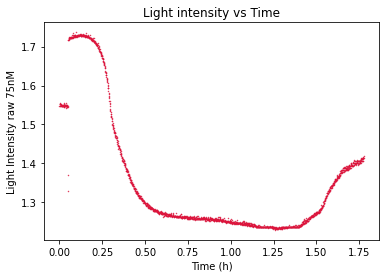

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2,Time
0,1.299,1.371,1.548,1.627,1.859,1.432,1.240,2.386,1.199,1.171,1.397,1.352,1.502,1.279,1.208,1.431,0.000000
1,1.299,1.369,1.547,1.626,1.855,1.435,1.236,2.386,1.197,1.168,1.401,1.352,1.506,1.276,1.214,1.433,0.000889
2,1.303,1.369,1.552,1.631,1.855,1.430,1.237,2.392,1.201,1.170,1.403,1.354,1.506,1.276,1.201,1.434,0.001778
3,1.300,1.369,1.552,1.627,1.854,1.431,1.237,2.390,1.199,1.175,1.402,1.354,1.507,1.277,1.211,1.440,0.002667
4,1.303,1.366,1.555,1.628,1.856,1.439,1.240,2.390,1.199,1.170,1.401,1.352,1.503,1.276,1.225,1.435,0.003556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.312,1.078,1.410,1.776,1.870,1.441,1.245,2.407,1.207,1.181,1.408,1.365,1.507,1.284,1.210,1.439,1.773333
1996,1.313,1.074,1.415,1.776,1.871,1.442,1.246,2.407,1.207,1.178,1.405,1.360,1.512,1.286,1.213,1.436,1.774222
1997,1.313,1.076,1.414,1.784,1.869,1.438,1.245,2.409,1.213,1.177,1.409,1.367,1.511,1.284,1.228,1.437,1.775111
1998,1.311,1.075,1.414,1.780,1.875,1.441,1.245,2.407,1.211,1.177,1.410,1.363,1.508,1.285,1.207,1.437,1.776000


In [48]:
DF = graphs_vs_t(DF, 2, 3)
DF

Calculations of the average signal variation over time, in a 10-row calculation window, to smooth out signal fluctuations

In [49]:
def derivative(df, wl=10):
    derivated = df.diff().rolling(window=wl).mean()[::wl] 
    return derivated


In [50]:
DF = derivative(DF, 10)
DF

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.0001,-0.0002,0.0000,-0.0001,-0.0004,0.0003,-0.0003,0.0003,0.0001,0.0000,0.0009,0.0002,0.0005,-0.0001,-0.0008,-0.0002,0.000889
20,0.0003,-0.0001,0.0003,0.0002,0.0000,-0.0006,0.0001,0.0000,-0.0001,0.0000,-0.0004,-0.0002,0.0003,0.0004,0.0005,-0.0001,0.000889
30,-0.0001,-0.0002,-0.0007,0.0001,-0.0001,0.0006,0.0002,0.0002,0.0000,-0.0002,-0.0002,0.0005,-0.0006,-0.0006,-0.0002,0.0003,0.000889
40,0.0000,0.0006,0.0005,-0.0005,0.0001,-0.0001,0.0000,0.0007,0.0003,0.0002,0.0006,-0.0001,0.0000,0.0005,0.0005,-0.0003,0.000889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-0.0002,0.0002,-0.0007,0.0000,0.0002,-0.0004,-0.0002,0.0000,0.0000,-0.0004,0.0001,0.0000,0.0001,0.0006,0.0012,0.0002,0.000889
1960,0.0004,0.0003,-0.0003,-0.0004,-0.0001,0.0003,0.0000,0.0001,0.0001,0.0004,0.0000,0.0002,-0.0008,-0.0005,-0.0002,-0.0003,0.000889
1970,-0.0002,0.0004,0.0008,0.0001,0.0002,-0.0001,0.0000,0.0000,-0.0001,0.0006,0.0000,0.0005,0.0002,0.0005,0.0004,-0.0003,0.000889
1980,-0.0002,0.0001,-0.0003,0.0000,-0.0004,0.0002,0.0000,0.0001,0.0002,-0.0006,-0.0002,-0.0007,0.0000,-0.0003,-0.0011,0.0004,0.000889


In [51]:
def graphs_vs_t_derivated(df, wl=10, i=0, j=15, col="black"):
    t_cicle = 3.2 * wl
    t_seg = np.arange(0, round((len(df))*(t_cicle), 2), t_cicle)  
    t_hour = t_seg * (1/3600)
    df["Time"]= t_hour 
    for column in df.iloc[:, i:j]:
        if column != "Time":
            plt.scatter(x=df["Time"], y=df[column], color=col, s=0.2)
            plt.title("Light intensity vs Time", loc = "center")
            plt.ylabel(f"Light Intensity raw {column}")
            plt.xlabel("Time (h)")
            plt.show()
        else:
            pass
    return df

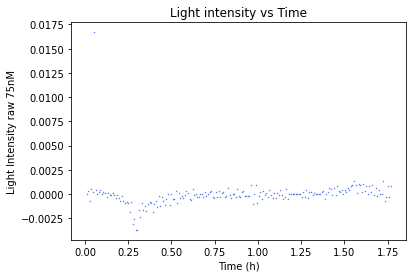

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
10,0.0001,-0.0002,0.0000,-0.0001,-0.0004,0.0003,-0.0003,0.0003,0.0001,0.0000,0.0009,0.0002,0.0005,-0.0001,-0.0008,-0.0002,0.008889
20,0.0003,-0.0001,0.0003,0.0002,0.0000,-0.0006,0.0001,0.0000,-0.0001,0.0000,-0.0004,-0.0002,0.0003,0.0004,0.0005,-0.0001,0.017778
30,-0.0001,-0.0002,-0.0007,0.0001,-0.0001,0.0006,0.0002,0.0002,0.0000,-0.0002,-0.0002,0.0005,-0.0006,-0.0006,-0.0002,0.0003,0.026667
40,0.0000,0.0006,0.0005,-0.0005,0.0001,-0.0001,0.0000,0.0007,0.0003,0.0002,0.0006,-0.0001,0.0000,0.0005,0.0005,-0.0003,0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-0.0002,0.0002,-0.0007,0.0000,0.0002,-0.0004,-0.0002,0.0000,0.0000,-0.0004,0.0001,0.0000,0.0001,0.0006,0.0012,0.0002,1.733333
1960,0.0004,0.0003,-0.0003,-0.0004,-0.0001,0.0003,0.0000,0.0001,0.0001,0.0004,0.0000,0.0002,-0.0008,-0.0005,-0.0002,-0.0003,1.742222
1970,-0.0002,0.0004,0.0008,0.0001,0.0002,-0.0001,0.0000,0.0000,-0.0001,0.0006,0.0000,0.0005,0.0002,0.0005,0.0004,-0.0003,1.751111
1980,-0.0002,0.0001,-0.0003,0.0000,-0.0004,0.0002,0.0000,0.0001,0.0002,-0.0006,-0.0002,-0.0007,0.0000,-0.0003,-0.0011,0.0004,1.760000


In [52]:
DF = graphs_vs_t_derivated(DF, 10, 2, 3, "royalblue")
DF

The graph shows the change in the slope of the first derivative, which is the parameter used to determine the response time.

In future versions, the inflection point in the derivative will be determined mathematically, apart from being displayed in graph.

In [53]:
def second_der(df):
    df_seg_der = df.diff()
    return df_seg_der

In [54]:
DF = second_der(DF)
DF

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008889
20,0.0002,0.0001,0.0003,0.0003,0.0004,-0.0009,0.0004,-0.0003,-0.0002,0.0000,-0.0013,-0.0004,-0.0002,0.0005,0.0013,1.000000e-04,0.008889
30,-0.0004,-0.0001,-0.0010,-0.0001,-0.0001,0.0012,0.0001,0.0002,0.0001,-0.0002,0.0002,0.0007,-0.0009,-0.0010,-0.0007,4.000000e-04,0.008889
40,0.0001,0.0008,0.0012,-0.0006,0.0002,-0.0007,-0.0002,0.0005,0.0003,0.0004,0.0008,-0.0006,0.0006,0.0011,0.0007,-6.000000e-04,0.008889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-0.0004,-0.0002,-0.0020,-0.0003,0.0003,-0.0007,-0.0004,0.0001,0.0000,-0.0004,0.0005,0.0000,-0.0004,0.0006,0.0016,6.000000e-04,0.008889
1960,0.0006,0.0001,0.0004,-0.0004,-0.0003,0.0007,0.0002,0.0001,0.0001,0.0008,-0.0001,0.0002,-0.0009,-0.0011,-0.0014,-5.000000e-04,0.008889
1970,-0.0006,0.0001,0.0011,0.0005,0.0003,-0.0004,0.0000,-0.0001,-0.0002,0.0002,0.0000,0.0003,0.0010,0.0010,0.0006,-2.217193e-17,0.008889
1980,0.0000,-0.0003,-0.0011,-0.0001,-0.0006,0.0003,0.0000,0.0001,0.0003,-0.0012,-0.0002,-0.0012,-0.0002,-0.0008,-0.0015,7.000000e-04,0.008889


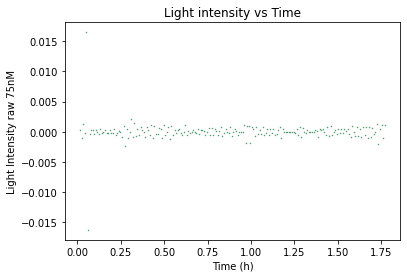

,10^8cop_h,75nM_h,75nM,p18_h,empty_1,empty_2,AuNP,PBS,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8,AuNP_2,PBS_2,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008889
20,0.0002,0.0001,0.0003,0.0003,0.0004,-0.0009,0.0004,-0.0003,-0.0002,0.0000,-0.0013,-0.0004,-0.0002,0.0005,0.0013,1.000000e-04,0.017778
30,-0.0004,-0.0001,-0.0010,-0.0001,-0.0001,0.0012,0.0001,0.0002,0.0001,-0.0002,0.0002,0.0007,-0.0009,-0.0010,-0.0007,4.000000e-04,0.026667
40,0.0001,0.0008,0.0012,-0.0006,0.0002,-0.0007,-0.0002,0.0005,0.0003,0.0004,0.0008,-0.0006,0.0006,0.0011,0.0007,-6.000000e-04,0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-0.0004,-0.0002,-0.0020,-0.0003,0.0003,-0.0007,-0.0004,0.0001,0.0000,-0.0004,0.0005,0.0000,-0.0004,0.0006,0.0016,6.000000e-04,1.733333
1960,0.0006,0.0001,0.0004,-0.0004,-0.0003,0.0007,0.0002,0.0001,0.0001,0.0008,-0.0001,0.0002,-0.0009,-0.0011,-0.0014,-5.000000e-04,1.742222
1970,-0.0006,0.0001,0.0011,0.0005,0.0003,-0.0004,0.0000,-0.0001,-0.0002,0.0002,0.0000,0.0003,0.0010,0.0010,0.0006,-2.217193e-17,1.751111
1980,0.0000,-0.0003,-0.0011,-0.0001,-0.0006,0.0003,0.0000,0.0001,0.0003,-0.0012,-0.0002,-0.0012,-0.0002,-0.0008,-0.0015,7.000000e-04,1.760000


In [55]:
DF = graphs_vs_t_derivated(DF, 10, 2, 3, "seagreen")
DF

The point corresponds to a maximum when the second derivative is positive and is negative when it is a minimum. 


At an inflection point, that is, when there is a change in concavity in the function, the second derivative becomes zero.

The result is not so clear. In future versions the data will be filtered before calculating the first and second derivative.